In [2]:
# importing all the libraries we need
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:

# Dataset setup and training configuration for Cats vs Dogs classifier
PATH = r"C:\Users\bezis\Downloads\cats_and_dogs\cats_and_dogs"

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150





In [4]:
# this one classifes the as cats and dogd in the test folder
import os, shutil

test_path = r"C:\Users\bezis\Downloads\cats_and_dogs\cats_and_dogs\test"
cats_folder = os.path.join(test_path, "cats")
dogs_folder = os.path.join(test_path, "dogs")

os.makedirs(cats_folder, exist_ok=True)
os.makedirs(dogs_folder, exist_ok=True)
for fname in os.listdir(test_path):
    file_path = os.path.join(test_path, fname)
    if os.path.isfile(file_path):  # only files
        if fname.startswith("cat") or fname in ["1.jpg","2.jpg","3.jpg","4.jpg","5.jpg","6.jpg","7.jpg","8.jpg","9.jpg","10.jpg","11.jpg","12.jpg","13.jpg","14.jpg","15.jpg","16.jpg","17.jpg","18.jpg","19.jpg","20.jpg","21.jpg","22.jpg","23.jpg","24.jpg","25.jpg"]:
            shutil.move(file_path, os.path.join(cats_folder, fname))
        else:
            shutil.move(file_path, os.path.join(dogs_folder, fname))

print("Cats images:", os.listdir(cats_folder))
print("Dogs images:", os.listdir(dogs_folder))



Cats images: ['1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '2.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
Dogs images: ['.DS_Store', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '50.jpg']


In [5]:
train_dir = r"C:\Users\bezis\Downloads\cats_and_dogs\cats_and_dogs\train"
val_dir   = r"C:\Users\bezis\Downloads\cats_and_dogs\cats_and_dogs\validation"
test_dir  = r"C:\Users\bezis\Downloads\cats_and_dogs\cats_and_dogs\test"


In [6]:
# Step 5: Load images from folders using ImageDataGenerator
# This function automatically:
# 1. Reads all images inside subfolders of a given path
# 2. Resizes images to target size
# 3. Labels images according to subfolder names (cats, dogs)
# 4. Prepares batches for training, validation, or testing
os.makedirs(os.path.join(test_dir, "cats"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "dogs"), exist_ok=True)
for fname in os.listdir(test_dir):
    file_path = os.path.join(test_dir, fname)
    if os.path.isfile(file_path):
        if fname.startswith("cat"):
            shutil.move(file_path, os.path.join(test_dir, "cats", fname))
        elif fname.startswith("dog"):
            shutil.move(file_path, os.path.join(test_dir, "dogs", fname))

batch_size = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150


train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


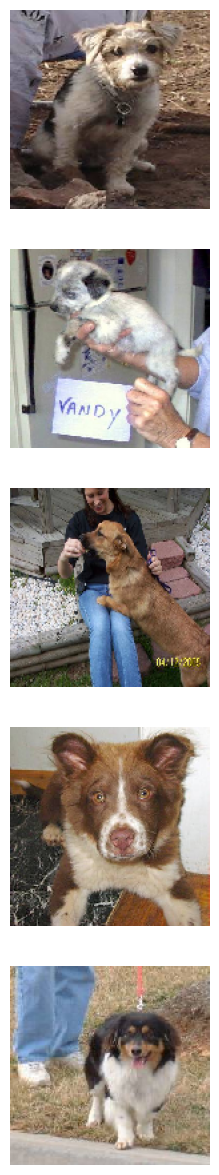

In [7]:
#this functione shows the first five images
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [8]:
# Data Augmentation:
# 1. Reduce overfitting by applying random transformations
# 2. Help the model generalize better by seeing images 
#    from different angles, positions, and scales
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Found 2000 images belonging to 2 classes.


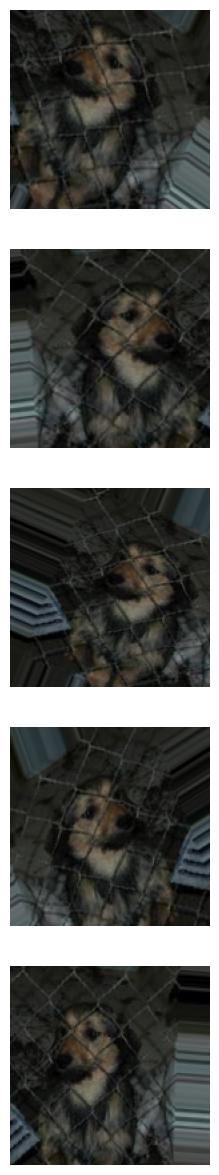

In [9]:
# we are trying to see what we did before by taking an example
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [10]:
# CNN model for binary image classification (cats vs dogs)
# - Uses 3 convolutional + pooling layers to extract features
# - Dense layer with 512 units for learning complex patterns
# - Dropout(0.5) to reduce overfitting
# - Sigmoid output layer for binary classification
# - Compiled with Adam optimizer and binary crossentropy loss
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics = ['accuracy']
)
model.summary()

C:\Users\bezis\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Training parameters
epochs = 40
batch_size = 32

# Number of steps per epoch
steps_per_epoch = train_data_gen.n // batch_size
validation_steps = val_data_gen.n // batch_size

# Train the model
history = model.fit(
    train_data_gen,                 # training generator
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_data_gen,   # validation generator
    validation_steps=validation_steps
)


C:\Users\bezis\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 58s 860ms/step - accuracy: 0.4975 - loss: 0.7354 - val_accuracy: 0.5524 - val_loss: 0.6929
Epoch 2/40
 1/62 ━━━━━━━━━━━━━━━━━━━━ 33s 548ms/step - accuracy: 0.6250 - loss: 0.6903

C:\Users\bezis\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.6250 - loss: 0.6903 - val_accuracy: 0.5212 - val_loss: 0.6930
Epoch 3/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 47s 747ms/step - accuracy: 0.5097 - loss: 0.6932 - val_accuracy: 0.5766 - val_loss: 0.6916
Epoch 4/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.4062 - loss: 0.6965 - val_accuracy: 0.5827 - val_loss: 0.6915
Epoch 5/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 37s 606ms/step - accuracy: 0.5330 - loss: 0.6910 - val_accuracy: 0.5675 - val_loss: 0.6818
Epoch 6/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.5312 - loss: 0.6903 - val_accuracy: 0.5998 - val_loss: 0.6813
Epoch 7/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 46s 744ms/step - accuracy: 0.5417 - loss: 0.6904 - val_accuracy: 0.5696 - val_loss: 0.6797
Epoch 8/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.5625 - loss: 0.7230 - val_accuracy: 0.5817 - val_loss: 0.6777
Epoch 9/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 649ms/step - accuracy: 0.5711 - loss: 0.6811 - val_accuracy: 0.6089 - val_

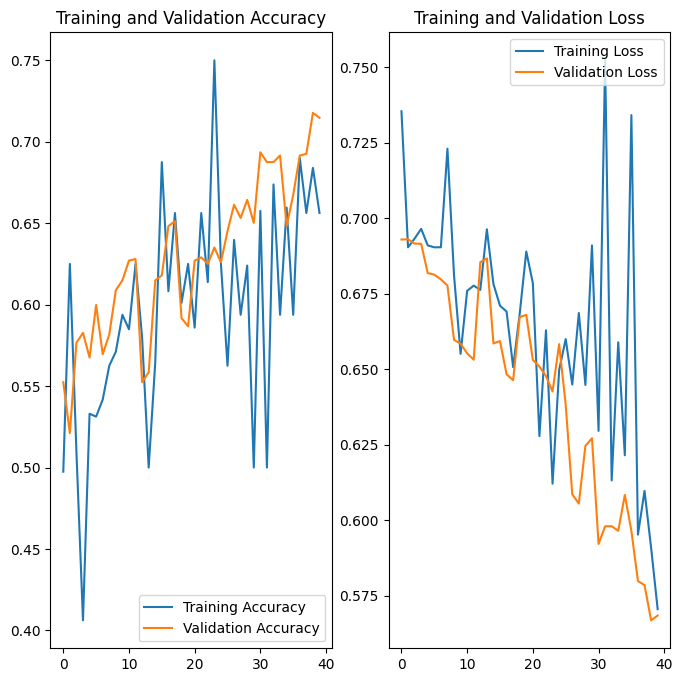

In [12]:

#Now we are trying to visualizae the training and validation accuracy plus their lose
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 50 images belonging to 2 classes.


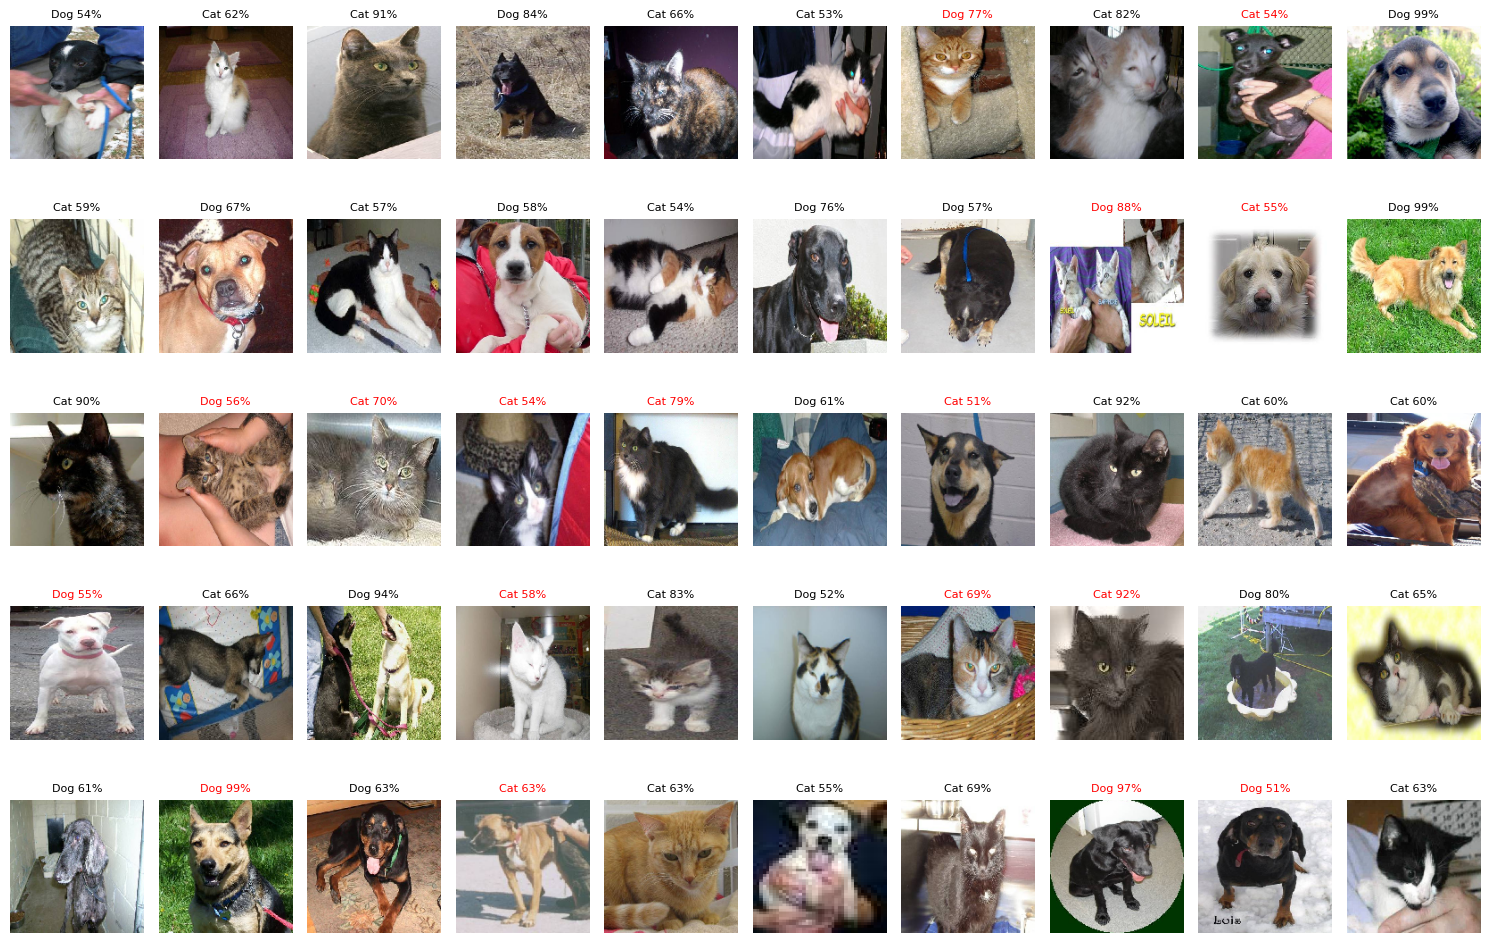

In [13]:
# here we are trying to classify all the 50 images as cat and dog
# the one which have small accuracy are highlighted

test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=50,      # all 50 images
    class_mode='binary',
    shuffle=False
)


test_images, _ = next(test_data_gen)

pred_probs = model.predict(test_images, verbose=0)


pred_classes = [1 if prob >= 0.5 else 0 for prob in pred_probs]

prob_percentages = [int(prob[0]*100) if cls == 1 else int((1-prob[0])*100)
                    for prob, cls in zip(pred_probs, pred_classes)]

answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]


plt.figure(figsize=(15, 10))  # 5 rows × 10 columns

for i in range(len(test_images)):
    plt.subplot(5, 10, i+1)
    plt.imshow(test_images[i])
    plt.axis('off')
    label = f'Dog {prob_percentages[i]}%' if pred_classes[i] == 1 else f'Cat {prob_percentages[i]}%'
    # Highlight wrong predictions in red
    if pred_classes[i] != answers[i]:
        plt.title(label, color='red', fontsize=8)
    else:
        plt.title(label, fontsize=8)

plt.tight_layout()
plt.show()

In [14]:
# Step 8: Calculate accuracy using pred_classes
correct = sum([pred == ans for pred, ans in zip(pred_classes, answers)])
percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
    print("You passed the challenge!")
else:
    print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying")

Your model correctly identified 66.0% of the images of cats and dogs.
You passed the challenge!


In [17]:
model.save("cat_dog_model.keras")


In [18]:
import tensorflow as tf
model = tf.keras.models.load_model("cat_dog_model.keras")


C:\Users\bezis\anaconda3\envs\tf_env\lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [3]:
import tensorflow as tf

#model = tf.keras.models.load_model("cat_dog_model.keras", compile=False)
# OR, if using .h5:
model = tf.keras.models.load_model("Cat_dog_model.h5", compile=False)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)